1.Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [24]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [25]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for testing

In [27]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
y_pred = knn_regressor.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 108.14198878074414


2.Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [30]:
import pandas as pd

In [31]:
iris = load_iris()
X = iris.data
y = iris.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

In [34]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

In [35]:
print(f"Accuracy with Euclidean distance: {accuracy_euclidean}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan}")


Accuracy with Euclidean distance: 1.0
Accuracy with Manhattan distance: 1.0


3.Train a KNN Classifier with different values of K and visualize decision boundaried.

In [41]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap

In [37]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [38]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [43]:
for n_neighbors in [1, 5, 15]:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

In [46]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0, 0.5, 'Sepal width')

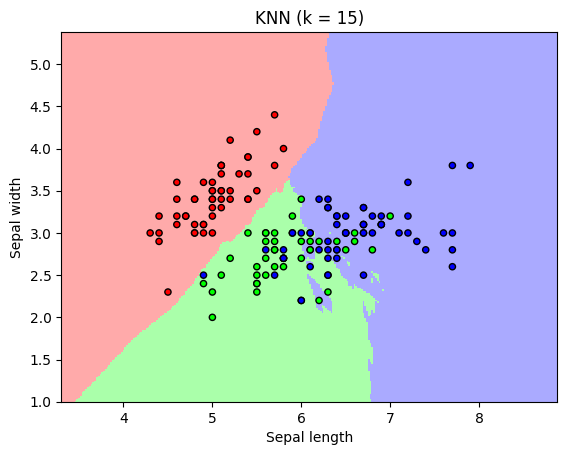

In [47]:
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'KNN (k = {n_neighbors})')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

4.Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
iris = load_iris()
X = iris.data
y = iris.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

In [54]:
print(f"Accuracy without scaling: {accuracy_unscaled}")
print(f"Accuracy with scaling: {accuracy_scaled}")

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


5.5 Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [55]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [56]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

In [57]:
pca = PCA()

In [58]:
pca.fit(X)

PCA()

In [59]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [4.76565106e-01 1.78698780e-01 1.02165903e-01 8.00116813e-02
 4.70516500e-02 4.02907152e-02 3.79195404e-02 3.72966233e-02
 1.98430843e-17 0.00000000e+00]


6.Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [60]:
iris = load_iris()
X = iris.data
y = iris.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

In [64]:
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [65]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [66]:
print(f"Accuracy without PCA: {accuracy_no_pca}")
print(f"Accuracy with PCA: {accuracy_pca}")

Accuracy without PCA: 1.0
Accuracy with PCA: 0.9555555555555556


7.Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV5.

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [68]:
iris = load_iris()
X = iris.data
y = iris.target

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [71]:
knn = KNeighborsClassifier()

In [72]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation

In [73]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [74]:
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [75]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


8.Train a KNN Classifier and check the number of misclassified samples.

In [76]:
iris = load_iris()
X = iris.data
y = iris.target

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred = knn.predict(X_test)


In [80]:
misclassified_samples = (y_test != y_pred).sum()

In [81]:
print(f"Number of misclassified samples: {misclassified_samples}")

Number of misclassified samples: 0


9.Train a PCA model and visualize the cumulative explained variance.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [83]:
iris = load_iris()
X = iris.data
y = iris.target

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
pca = PCA()  # You can specify the number of components with n_components
pca.fit(X_scaled)

PCA()

In [86]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

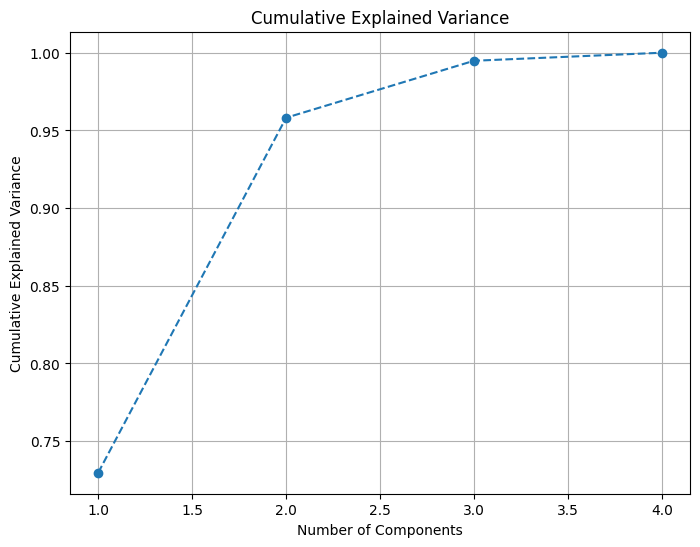

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

10.Train a KNN Regressor and analyze the effect of different K values on performance.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [89]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
k_values = range(1, 21)

In [92]:
mse_values = []

In [93]:
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

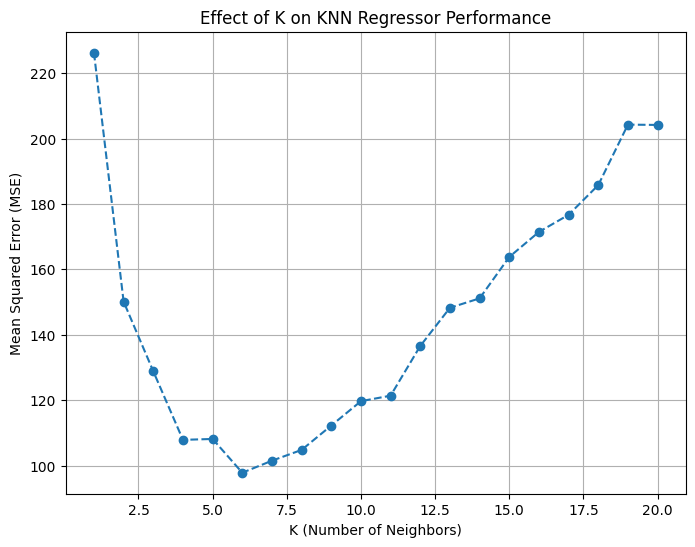

In [94]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='--')
plt.title('Effect of K on KNN Regressor Performance')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()